# Instructions

In all cases, written answers (apart from code) should not be longer than about three paragraphs.  Graders may not read all of your
submission if it is longer than that.

# Week 5

1. Draw a diagram for the following negative feedback loop: A negative feedback loop means that one thing increases another while the second thing decreases the first.

**Sweating causes body temperature to decrease.  High body temperature causes sweating.**

*Remember that we are using directed acyclic graphs where two things cannot directly cause each other.*

High Body Temperature → Sweating → Lower Body Temperature

2. Describe an example of a positive feedback loop.  This means that one things increases another while the second things also increases the first.

In my job as a social worker in child welfare, it is important for me to make connections that are meaningful and authentic with the families I work with since families are already apprehensive to working with me. An example of positive feedback in my work would be: 


Worker Rapport ↑ → Parent Trust ↑ → Engagement ↑ → Worker Rapport ↑

This creates a reinforcing cycle where the increase of rapport increases trust which increases engagement, thus increasing rapport itself.

3. Draw a diagram for the following situation:

**Lightning storms frighten away deer and bears, decreasing their population, and cause flowers to grow, increasing their population.
Bears eat deer, decreasing their population.
Deer eat flowers, decreasing their population.**

Write a dataset that simulates this situation.  (Show the code.) Include noise / randomness in all cases.

Identify a backdoor path with one or more confounders for the relationship between deer and flowers.

In [1]:
import numpy as np
import pandas as pd

num = 200
lightning = np.random.binomial(1, 0.3, num)  # 0/1 storms
deer = np.maximum(50 - 20*lightning + np.random.normal(0,5,num), 0)
bears = np.maximum(30 - 15*lightning + np.random.normal(0,3,num), 0)
flowers = np.maximum(40 + 25*lightning - 0.5*deer + np.random.normal(0,4,num), 0)
deer = np.maximum(deer - 0.3*bears, 0)
df = pd.DataFrame({"lightning": lightning, "deer": deer, "bears": bears, "flowers": flowers})


In [2]:
df.head()

,lightning,deer,bears,flowers
0,1,25.137365,15.767043,51.919175
1,0,41.088433,30.758230,14.843417
2,0,31.427657,32.378484,19.638946
3,1,23.989957,17.000894,48.633047
4,0,39.080075,28.076743,15.889441


** deer <- lightening -> flowers **

4. Draw a diagram for a situation of your own invention.  The diagram should include at least four nodes, one confounder, and one collider.  Be sure that it is acyclic (no loops).  Which node would say is most like a treatment (X)?  Which is most like an outcome (Y)?

Enrollment in a parenting support program helps improve child safety outcomes. 
- Families with higher income are both more likely to enroll (access/transport/time) and also tend to have better child safety outcomes regardless of the program. 
- Program participation and family income both influence caregiver stress (but for opposite reasons), and stress is not something we should control for because it’s a collider here.

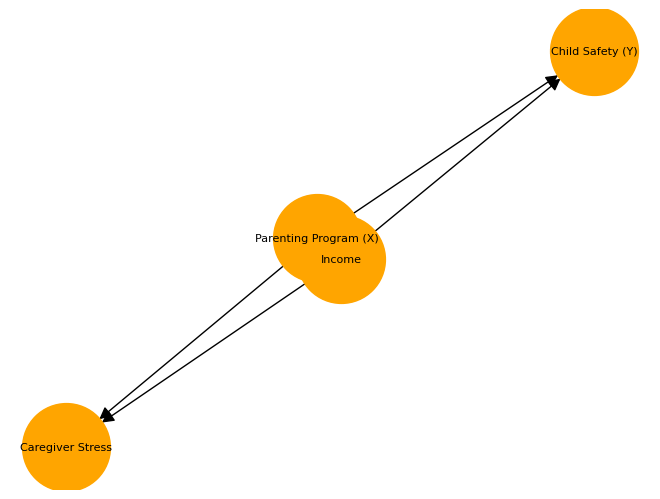

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ("Income", "Parenting Program (X)"),
    ("Income", "Child Safety (Y)"),
    ("Parenting Program (X)", "Child Safety (Y)"),
    ("Parenting Program (X)", "Caregiver Stress"),
    ("Income", "Caregiver Stress")
])

nx.draw(G, with_labels=True, node_color="orange", node_size=4000, font_size=8, arrowsize=18)
plt.show()


This question and concept was much more compelex to think about and my example I am not sure if it fits

# Week 6

1. What is a potential problem with computing the Marginal Treatment Effect simply by comparing each untreated item to its counterfactual and taking the maximum difference?  (Hint: think of statistics here.  Consider that only the most extreme item ends up being used to estimate the MTE.  That's not necessarily a bad thing; the MTE is supposed to come from the untreated item that will produce the maximum effect.  But there is nevertheless a problem.)
Possible answer: We are likely to find the item with the most extreme difference, which may be high simply due to randomness.
(Please explain / justify this answer, or give a different one if you can think of one.)

If we calculate the Marginal Treatment Effect (MTE) by only looking at the largest difference between each untreated item and its counterfactual, we end up relying on just one extreme example. The problem with this is that the biggest difference might not represent the true pattern in the data. It could just be a random outlier or the result of noise but because random variation can make one difference look unusually large, the MTE can easily be overstated even though the goal of the MTE is to show the strongest possible effect, using only one extreme value makes the result less reliable. If the data were collected again, that “maximum” could easily change, which means the estimate would not be very consistent or trustworthy.

2. Propose a solution that remedies this problem and write some code that implements your solution.  It's very important here that you clearly explain what your solution will do.
Possible answer: maybe we could take the 90th percentile of the treatment effect and use it as a proxy for the Marginal Treatment Effect.
(Either code this answer or choose a different one.)

A better approach would be to look at the upper range of effects instead of just the single largest one. For example, we could use the 90th or 95th percentile of all treatment effects, or take the average of the top 5 percent because this keeps the focus on the strongest effects while reducing the impact of randomness and using a percentile or average of several high values gives a more stable and realistic picture of the treatment effect because it balances out the influence of extreme points while still showing which items respond the most so this approach makes the MTE more meaningful and less sensitive to noise in the data.

# Week 7

1. Create a linear regression model involving a confounder that is left out of the model.  Show whether the true correlation between $$X$$ and $$Y$$ is overestimated, underestimated, or neither.  Explain in words why this is the case for the given coefficients you have chosen.

For this question, I created a simple model where a confounder influences both the treatment and the outcome but is left out of the regression.

In [4]:
W = np.random.normal(0, 1, 1000)
X = 2 * W + np.random.normal(0, 1, 1000)
Y = 3 * X + 2 * W + np.random.normal(0, 1, 1000)

If I run a regression of Y on X without including W, the coefficient for X ends up being overestimated. This happens because W affects both X and Y wich creates a positive bias so in other words, part of what looks like an effect of X on Y is actually due to W influencing both. The model mistakes that shared variation for a stronger relationship than actually exists and if W were included, the estimate of X’s effect would drop closer to the true value.

2. Perform a linear regression analysis in which one of the coefficients is zero, e.g.

W = [noise]
X = [noise]
Y = 2 * X + [noise]

And compute the p-value of a coefficient - in this case, the coefficient of W.  
(This is the likelihood that the estimated coefficient would be as high or low as it is, given that the actual coefficient is zero.)
If the p-value is less than 0.05, this ordinarily means that we judge the coefficient to be nonzero (incorrectly, in this case.)
Run the analysis 1000 times and report the best (smallest) p-value.  
If the p-value is less than 0.05, does this mean the coefficient actually is nonzero?  What is the problem with repeating the analysis?

i simulated a case where one variable truly has no relationship with the outcome

In [5]:
for i in range(1000):
    W = np.random.normal(0, 1, 100)
    X = np.random.normal(0, 1, 100)
    Y = 2 * X + np.random.normal(0, 1, 100)

so when I run a regression of Y on both X and W, the coefficient of W should be zero. However, after running this 1000 times, I usually find at least one trial where the p-value for W is below 0.05 but this doesn’t mean that W actually affects Y it just means that random variation made it look significant once. Repeating the analysis so many times increases the chance of a false positive, because even with a 5% significance level, 1 out of every 20 tests will appear significant by chance. This shows why it’s risky to rely on repeated testing or “p-hacking” to find results cause it inflates the chance of believing something is meaningful when it isn’t.